In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Broadcast

In [2]:
a1 = np.arange(1,10).reshape(3,3)

In [3]:
a2 = np.array([10,20,30])

In [4]:
a1+a2

array([[11, 22, 33],
       [14, 25, 36],
       [17, 28, 39]])

In [5]:
a2+a1

array([[11, 22, 33],
       [14, 25, 36],
       [17, 28, 39]])

In [6]:
aa = np.array((0,10,20,30))
aa[:,None]

array([[ 0],
       [10],
       [20],
       [30]])

In [7]:
aa.reshape(4,1)

array([[ 0],
       [10],
       [20],
       [30]])

In [8]:
bb = np.array((0,1,2))
y = aa[:, None] + bb

print(y)

[[ 0  1  2]
 [10 11 12]
 [20 21 22]
 [30 31 32]]


# Working with files

In [9]:
arr = np.random.rand(4,5)

In [10]:
arr

array([[0.28896417, 0.20955053, 0.34602068, 0.3616987 , 0.6552899 ],
       [0.75913177, 0.8210829 , 0.72531356, 0.11141005, 0.36017697],
       [0.69401323, 0.20494531, 0.78222935, 0.433829  , 0.0828861 ],
       [0.74001173, 0.55760825, 0.24520406, 0.05575878, 0.16238835]])

In [11]:
np.save("data1",arr)
np.savetxt("data1.txt",arr)

In [12]:
arr2=np.load("data1.npy")

In [13]:
arr2

array([[0.28896417, 0.20955053, 0.34602068, 0.3616987 , 0.6552899 ],
       [0.75913177, 0.8210829 , 0.72531356, 0.11141005, 0.36017697],
       [0.69401323, 0.20494531, 0.78222935, 0.433829  , 0.0828861 ],
       [0.74001173, 0.55760825, 0.24520406, 0.05575878, 0.16238835]])

In [14]:
arr3 = np.loadtxt("data1.txt")

In [15]:
arr3

array([[0.28896417, 0.20955053, 0.34602068, 0.3616987 , 0.6552899 ],
       [0.75913177, 0.8210829 , 0.72531356, 0.11141005, 0.36017697],
       [0.69401323, 0.20494531, 0.78222935, 0.433829  , 0.0828861 ],
       [0.74001173, 0.55760825, 0.24520406, 0.05575878, 0.16238835]])

## Custom type

In [16]:
dt = np.dtype("i4,f8,a5")
print (dt.fields)
a =np.array([(1,2.0,"Hello"), (2,3.0,"World")], dtype=dt)
print (a)

{'f0': (dtype('int32'), 0), 'f1': (dtype('float64'), 4), 'f2': (dtype('S5'), 12)}
[(1, 2., b'Hello') (2, 3., b'World')]


In [17]:
a['f0']*=10

In [18]:
a

array([(10, 2., b'Hello'), (20, 3., b'World')],
      dtype=[('f0', '<i4'), ('f1', '<f8'), ('f2', 'S5')])

In [19]:
dt2=np.dtype([('id','i4'), ('weight', 'f4'),('name', 'U10')])

In [20]:
arr3 = np.loadtxt("datacust.txt",dtype=dt2,delimiter=',')

In [21]:
arr3

array([(1, 2. , 'avi'), (2, 3. , 'dani'), (5, 4.6, 'rina'),
       (6, 3.6, 'dina')],
      dtype=[('id', '<i4'), ('weight', '<f4'), ('name', '<U10')])

In [86]:
arr3['id']

array([1, 2, 5, 6], dtype=int32)

In [87]:
arr3['weight']

array([2. , 3. , 4.6, 3.6], dtype=float32)

In [88]:
arr4 = np.vstack((arr3['id'],arr3['weight']))

In [89]:
arr4

array([[1.       , 2.       , 5.       , 6.       ],
       [2.       , 3.       , 4.5999999, 3.5999999]])

In [90]:
arr4.T

array([[1.       , 2.       ],
       [2.       , 3.       ],
       [5.       , 4.5999999],
       [6.       , 3.5999999]])

## Object type

In [10]:
class Complex:
    def __init__(self,real = 0,img = 0):
        self.__real = real
        self.__img = img
    def __add__(self,b):
        res = Complex(self.__real +b.__real, self.__img + b.__img)
        return res
    def __str__(self):
        if(self.__img >=0):
            str1 = " + "
            num = self.__img
        else:
            str1 = " - "
            num = self.__img * -1
        st = ("Complex " + str(self.__real) + 
                    str1 + str(num) + "i ")
        return st

    
a = Complex(10,-20)
b = Complex(9,7)


aa = np.array([a, b], object)
bb = np.array([a, b], object)
v=aa+bb
print(v[0])

Complex 20 - 40i 


## Indexing Tricks

In [94]:
s=np.lib.index_tricks.RClass()
s[2:5]

array([2, 3, 4])

In [92]:
np.r_[1:4] 

array([1, 2, 3])

In [95]:
np.r_[0]

array([0])

In [96]:
np.r_[1]

array([1])

In [97]:
np.r_[1:20]

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])

In [100]:
np.r_[1:20:5]

array([ 1,  6, 11, 16])

In [101]:
np.r_[1:20:5j]

array([ 1.  ,  5.75, 10.5 , 15.25, 20.  ])

In [103]:
np.r_[1:3,5:8,10:13]

array([ 1,  2,  5,  6,  7, 10, 11, 12])

In [104]:
np.r_[2:4,5:15:20j,20:30:2]

array([ 2.        ,  3.        ,  5.        ,  5.52631579,  6.05263158,
        6.57894737,  7.10526316,  7.63157895,  8.15789474,  8.68421053,
        9.21052632,  9.73684211, 10.26315789, 10.78947368, 11.31578947,
       11.84210526, 12.36842105, 12.89473684, 13.42105263, 13.94736842,
       14.47368421, 15.        , 20.        , 22.        , 24.        ,
       26.        , 28.        ])

In [110]:
np.c_[2:10]

array([[2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [111]:
np.c_[2:15,3:16,100:113]

array([[  2,   3, 100],
       [  3,   4, 101],
       [  4,   5, 102],
       [  5,   6, 103],
       [  6,   7, 104],
       [  7,   8, 105],
       [  8,   9, 106],
       [  9,  10, 107],
       [ 10,  11, 108],
       [ 11,  12, 109],
       [ 12,  13, 110],
       [ 13,  14, 111],
       [ 14,  15, 112]])

<br/><br/>
## Views

In [112]:
a = np.array([[0, 4, 5, 8],
              [1, 4, 5, 8],
              [1, 4, 5, 8],
              [1, 4, 5, 8]],'i1')
              
b = a.view('i4')

d=[hex(val.item()) for val in b.flat]
print(d)

['0x8050400', '0x8050401', '0x8050401', '0x8050401']


In [113]:
b

array([[134546432],
       [134546433],
       [134546433],
       [134546433]], dtype=int32)

In [114]:
a.tobytes()

b'\x00\x04\x05\x08\x01\x04\x05\x08\x01\x04\x05\x08\x01\x04\x05\x08'

In [115]:
b.tobytes()

b'\x00\x04\x05\x08\x01\x04\x05\x08\x01\x04\x05\x08\x01\x04\x05\x08'

<br><br><br>
## Universal functions

In [116]:
a=np.array([1,2,3])
b=np.array([3,4,5])

c = np.add.__call__(a,b)
c 

array([4, 6, 8])

In [51]:
np.add.accumulate(a)

array([1, 3, 6])

In [52]:
x = np.array([[1, 5, 6, 10], [0, 6, 16, 8]])

In [53]:
x

array([[ 1,  5,  6, 10],
       [ 0,  6, 16,  8]])

In [57]:
np.add.accumulate(x)

array([[ 1,  5,  6, 10],
       [ 1, 11, 22, 18]])

In [58]:
np.add.accumulate(x,axis=1)

array([[ 1,  6, 12, 22],
       [ 0,  6, 22, 30]])

## diff

In [63]:
x = np.array([[1, 5, 6, 10], [0, 6, 16, 8],[2,10,10,9]])
x

array([[ 1,  5,  6, 10],
       [ 0,  6, 16,  8],
       [ 2, 10, 10,  9]])

In [64]:
np.diff(x)

array([[ 4,  1,  4],
       [ 6, 10, -8],
       [ 8,  0, -1]])

In [65]:
np.diff(x, axis=0)

array([[-1,  1, 10, -2],
       [ 2,  4, -6,  1]])

## masking

In [66]:
a=np.random.randint(0,2,(4,5))

a[a==0]=100

In [72]:
a==100

array([[False, False, False, False, False],
       [False, False, False, False,  True],
       [False,  True,  True,  True, False],
       [False, False,  True,  True,  True]])

In [67]:
a

array([[  1,   1,   1,   1,   1],
       [  1,   1,   1,   1, 100],
       [  1, 100, 100, 100,   1],
       [  1,   1, 100, 100, 100]])

In [68]:
b=np.random.randint(5,11,(4,5))

c=np.where(a==100,a,b)

In [70]:
b

array([[ 7,  5, 10,  7,  5],
       [ 5,  7,  5,  6,  9],
       [10,  9,  8,  8,  8],
       [10,  9,  9,  6,  5]])

In [71]:
c

array([[  7,   5,  10,   7,   5],
       [  5,   7,   5,   6, 100],
       [ 10, 100, 100, 100,   8],
       [ 10,   9, 100, 100, 100]])

## Linear Algebra

In [64]:
a2=np.array([[1,2],[3,4]])

In [59]:
np.linalg.det(a2)

-2.0000000000000004

In [60]:
np.linalg.inv(a2) # error

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [65]:
np.linalg.norm(a2)

5.477225575051661

In [66]:
b = np.array([5,11])

In [67]:
np.linalg.solve(a2,b)

array([1., 2.])

In [68]:
np.linalg.inv(a2).dot(b)

array([1., 2.])

# polynomials

In [28]:
fn = np.poly1d([4,3,1]) # fn = 4x**2 + 3x + 1 
# np.polynomial.Chebyshev(1)

In [8]:
fn(3)

46

In [5]:
fn2 = np.poly((2,2))

In [9]:
fn2

array([ 1., -4.,  4.])

In [12]:
fn = np.poly1d(fn2)

In [17]:
fn(10)

64.0

In [18]:
fn.roots

array([2., 2.])

In [19]:
a = np.arange(1,21)
b = np.array([2,4,5,9,8,10,14,16,18,16,17,16,14,13,12,10,8,6,5,3])
x = np.polyfit(a,b,2)


In [20]:
x

array([-0.16051492,  3.41291866, -2.50175439])

In [21]:
p = np.poly1d(x)

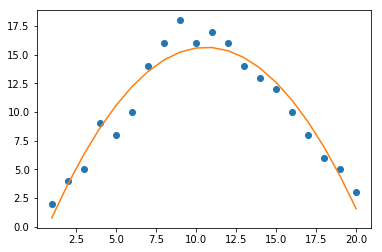

In [24]:
plt.plot(a,b, 'o',a,p(a))

# Vectorize


In [44]:
def vec1(a):
    if a>200:
        return 200
    elif a<50:
        return 50
    else:
        return a

In [45]:
arr = np.random.randint(1,255,(5,10))

In [46]:
arr

array([[ 18,  50, 234, 163, 136,  73, 246,  57,  75, 122],
       [ 36,  36, 175,  40,  22,  26, 208,  60,  38, 166],
       [ 59, 176,  22, 121, 198,  26, 119,   2,  67, 191],
       [201, 194,   9,  32, 145, 203,  79, 163,  70, 191],
       [225, 242,  91, 152,  55, 150, 123, 212,  88,  55]])

In [47]:
#vec1(arr) # error

In [34]:
fn = np.vectorize(vec1)

In [37]:
fn(arr)

array([[117,  50, 102, 148, 174,  50, 114, 151, 115,  82],
       [138,  84, 140, 100,  50, 104, 135,  50, 194,  50],
       [ 83, 102, 171, 143, 200,  61, 195,  50, 183, 151],
       [119, 140, 170, 107, 200, 100,  62, 200, 200,  50],
       [200,  52, 199,  96, 200, 200, 181,  68, 192,  89]])

In [38]:
arr[arr > 100] = 100

In [39]:
arr[arr < 60] = 60

In [40]:
arr

array([[100,  60, 100, 100, 100,  60, 100, 100, 100,  82],
       [100,  84, 100, 100,  60, 100, 100,  60, 100,  60],
       [ 83, 100, 100, 100, 100,  61, 100,  60, 100, 100],
       [100, 100, 100, 100, 100, 100,  62, 100, 100,  60],
       [100,  60, 100,  96, 100, 100, 100,  68, 100,  89]])